<a href="https://colab.research.google.com/github/umamahabbasi24/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: House Price Prediction using Regression Models

## Objective

The goal of this project is to develop a regression model to accurately predict **house prices** based on features such as square footage, number of bedrooms, and location. By learning patterns from historical data, the model aims to assist in real estate valuation and pricing strategies.

## Dataset

We are using the **House Price Prediction Dataset**, which is publicly available on [Kaggle](https://www.kaggle.com/). The dataset includes property-specific information like size, bedrooms, location, and price.

## Workflow

- Data loading and preprocessing
- Feature transformation (e.g., encoding location, scaling square footage)
- Model training using **Linear Regression** and/or **Gradient Boosting**
- Visualization of predicted vs actual house prices
- Evaluation using:
  - **Mean Absolute Error (MAE)**
  - **Root Mean Squared Error (RMSE)**

This notebook is implemented using Python on **Google Colab**, with libraries such as `pandas`, `scikit-learn`, `matplotlib`, and `seaborn`.


In [ ]:
# https://www.kaggle.com/datasets/vikasukani/mini-house-price-data-set

In [ ]:
# opendatasets to load dataset directly from kaggle
!pip install opendatasets
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/vikasukani/mini-house-price-data-set")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: heeheeee
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vikasukani/mini-house-price-data-set


100%|██████████| 260/260 [00:00<00:00, 321kB/s]

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session.

In [ ]:
# Import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Load data set
df  = pd.read_csv('/content/mini-house-price-data-set/minihomeprices.csv')


# show first five rows
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
# show information about data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


In [ ]:
# Descriptiion of our data set

df.describe().style.background_gradient(cmap='CMRmap')

,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [ ]:
#  to know how many null values

df.isna().sum()

,0
area,0
bedrooms,1
age,0
price,0


In [ ]:
# fill null values with median value

df['bedrooms'] = df['bedrooms'].fillna( df['bedrooms'].mean() )

#  here we can use inplace=True as well.  both are valid for update data frame

df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


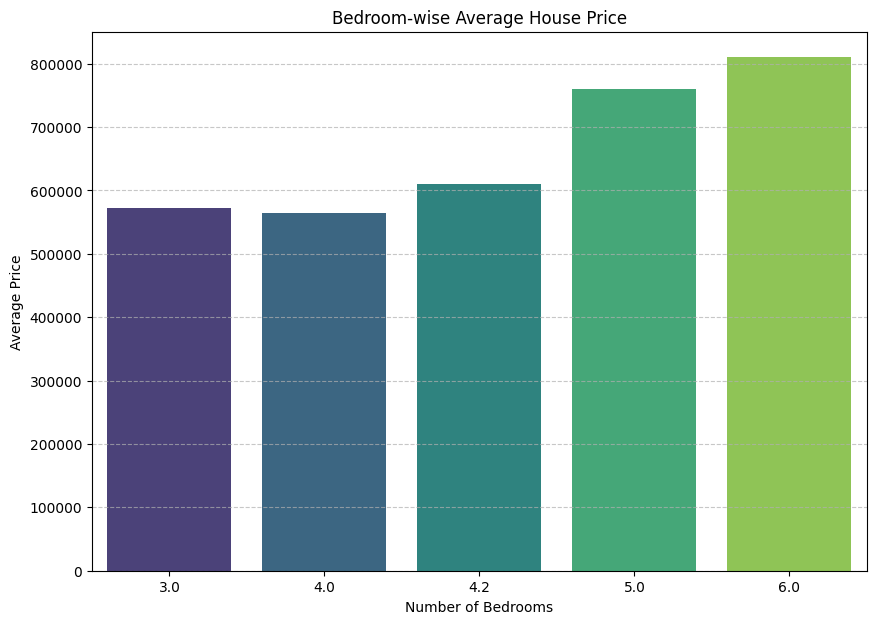

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot showing average price by number of bedrooms
plt.figure(figsize=(10, 7))
plt.title("Bedroom-wise Average House Price")
sns.barplot(x='bedrooms', y='price', data=df, estimator=np.mean, ci=None, palette='viridis')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

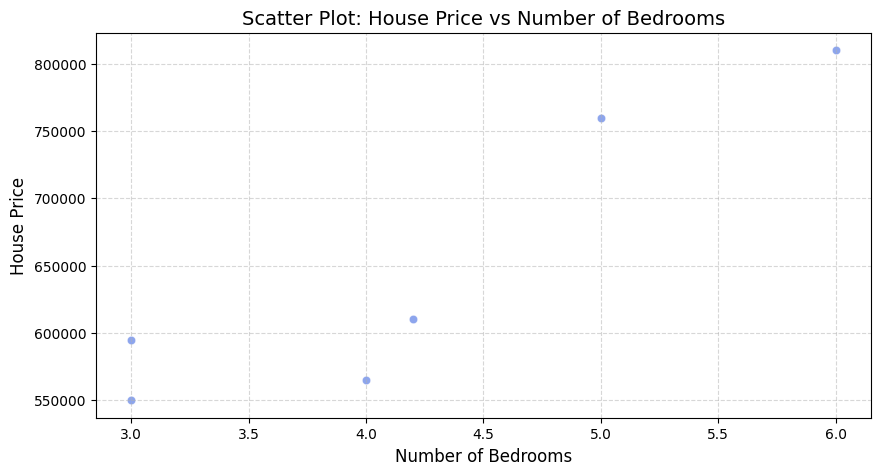

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='bedrooms', y='price', data=df, color='royalblue', alpha=0.6)

plt.title("Scatter Plot: House Price vs Number of Bedrooms", fontsize=14)
plt.xlabel("Number of Bedrooms", fontsize=12)
plt.ylabel("House Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<Figure size 1000x700 with 0 Axes>

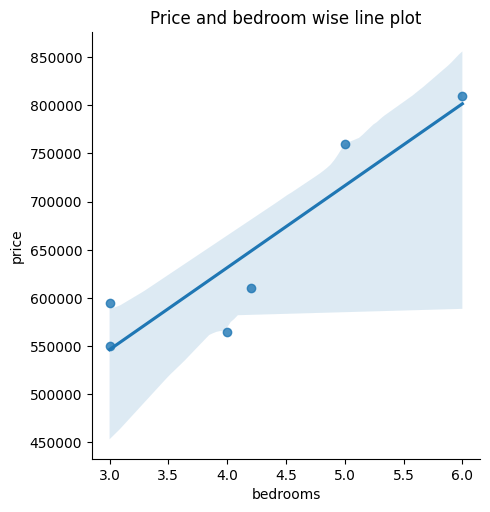

In [ ]:
plt.figure(figsize=(10, 7))

sns.lmplot(x="bedrooms", y="price", data=df);
plt.title("Price and bedroom wise line plot")
plt.show()

In [ ]:
# import model
from sklearn.linear_model import LinearRegression

In [ ]:
mdl = LinearRegression()

In [ ]:
#  Set dependent and independent variables

X = df.drop(['price'], axis=1)
y = df['price']

In [ ]:
# Change bedrooms data type flaot to int

df['bedrooms'] = df['bedrooms'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 324.0 bytes


In [ ]:
#  shows the variables
print(X)
print("-" * 25)
print(y)

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.2   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


In [ ]:
#  Fitting Model

mdl.fit( X, y  )

LinearRegression()

In [ ]:
# Now custimize prediction testing

mdl.predict([[ 4000, 2, 50 ]])
# show house price here

array([551989.04870256])

In [ ]:
mdl.coef_

array([  116.66950551, 18756.28806982, -3675.75111708])

In [ ]:
mdl.intercept_

np.float64(231586.00639409182)

In [ ]:
#  know score
score = mdl.score( X, y )

print(score * 100)

95.40926625396438


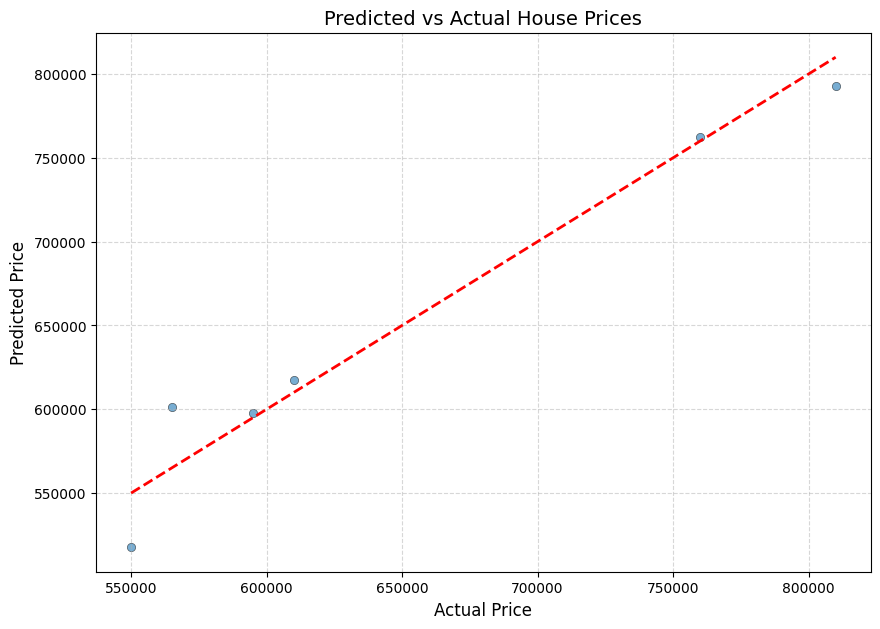

In [ ]:
y_pred = mdl.predict(X)

# … then visualize:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_test' is actual and 'y_pred' is predicted prices from your regression model
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y, y=y_pred, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()],
         color='red', linestyle='--', lw=2)
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Predicted vs Actual House Prices', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



In [ ]:
# … then evaluation:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute MAE and RMSE
mae_value = mean_absolute_error(y, y_pred)
rmse_value = np.sqrt(mean_squared_error(y, y_pred))

print(f"Mean Absolute Error (MAE): {mae_value:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_value:.2f}")

Mean Absolute Error (MAE): 16418.91
Root Mean Squared Error (RMSE): 21342.51
